# Data Scientist Hackathon

### Ricardo Bautista Huerta

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
import math
import warnings

In [2]:
warnings.filterwarnings("ignore")
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Cargando bases de datos

In [3]:
clients = pd.read_csv('clients_table.txt', sep=",")
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.000,0.000,121219.280,2019-01-08,NaN,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.000,1.000,159663.590,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaN,1979-02-27
4,15365443,EBERLE,Italy,Male,1.000,0.000,35521.280,2014-01-26,2015-12-04,1972-12-21
...,...,...,...,...,...,...,...,...,...,...
1544995,14878861,LEVENSTEIN,Italy,Female,0.000,0.000,99110.940,2019-08-26,NaN,1990-05-19
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaN,1984-04-08
1544997,14667679,MAASSEN,Spain,Male,1.000,0.000,83143.540,2014-12-19,2018-12-10,1963-05-09
1544998,14513378,KENIMER,France,Male,1.000,1.000,153913.740,2012-05-25,2014-05-03,1976-11-09


In [4]:
credit_score = pd.read_csv('credit_score_table.txt', sep=",")
credit_score

,CustomerId,Date,Score
0,14759722,2018-07,717
1,15907276,2011-09,562
2,15346641,2013-01,604
3,15595126,2018-08,469
4,15227788,2013-09,655
...,...,...,...
19499995,15963320,2014-04,737
19499996,15647539,2012-06,615
19499997,14993580,2018-01,651
19499998,15860358,2011-11,528


In [5]:
products = pd.read_csv('products_table.txt', sep=",")
products

,ContractId,CustomerId,Products
0,5Xo9sCduOGo5EhBYhzKrSlLIA,14993808,Product B
1,3nQbqbnpTeSkYIJWT1UDe1GZ1,15560417,Product B
2,PD9KwDPOwyJWO6LJKPGBbkrCz,15406428,Product C
3,IhS7pz8lu07LCZSqYNlL0fuLP,15604313,Product B
4,ftUey4oVmkZj8RaBVFH6SNzVM,14952409,Product C
...,...,...,...
3739187,gG68mjjODmTNM21QPEeAKr0DZ,14723530,Product C
3739188,yWf0PHzqSjJvadbdMji4XtX5T,15837225,Product D
3739189,5kerYoMKP03ebWSrloZBjmWKz,14661828,Product C
3739190,CdnDnTfN3YYOozLACqf9fBak1,15559545,Product D


In [6]:
transactions = pd.read_csv('transactions_table.txt', sep=",")
transactions

,CustomerId,Transaction,Value
0,15653320,trans_4,-294.030
1,14955663,trans_3,1297.970
2,15218505,trans_4,191.280
3,15391934,trans_3,2299.070
4,14847291,trans_3,1612.100
...,...,...,...
7499995,14927077,trans_2,80.060
7499996,15525450,trans_2,-732.020
7499997,15827138,trans_4,-24.890
7499998,14742523,trans_4,-549.890


## Filtrando

### Contratos del 2015 en adelante

In [7]:
clients['application_date'] = pd.to_datetime(clients['application_date'], format='%Y/%m/%d')
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.000,0.000,121219.280,2019-01-08,NaN,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.000,1.000,159663.590,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaN,1979-02-27
4,15365443,EBERLE,Italy,Male,1.000,0.000,35521.280,2014-01-26,2015-12-04,1972-12-21
...,...,...,...,...,...,...,...,...,...,...
1544995,14878861,LEVENSTEIN,Italy,Female,0.000,0.000,99110.940,2019-08-26,NaN,1990-05-19
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaN,1984-04-08
1544997,14667679,MAASSEN,Spain,Male,1.000,0.000,83143.540,2014-12-19,2018-12-10,1963-05-09
1544998,14513378,KENIMER,France,Male,1.000,1.000,153913.740,2012-05-25,2014-05-03,1976-11-09


In [8]:
clients['application_date'].dt.year.unique()

array([2018, 2019, 2012, 2014, 2013, 2017, 2016, 2015], dtype=int64)

In [9]:
clients = clients[clients['application_date'].dt.year >= 2015]
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.000,0.000,121219.280,2019-01-08,NaN,1980-08-03
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaN,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaN,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
...,...,...,...,...,...,...,...,...,...,...
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaN,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaN,1964-08-27
1544995,14878861,LEVENSTEIN,Italy,Female,0.000,0.000,99110.940,2019-08-26,NaN,1990-05-19
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaN,1984-04-08


In [10]:
clients['application_date'].dt.year.unique()

array([2018, 2019, 2017, 2016, 2015], dtype=int64)

In [11]:
clients.shape

(623242, 10)

### Las operaciones estuvieron cerradas en el 2019 en Italia

In [12]:
clients['Geography'].unique()

array(['Germany', 'Italy', 'Spain', 'France', nan], dtype=object)

In [13]:
clients['exit_date'] = pd.to_datetime(clients['exit_date'], format='%Y/%m/%d')
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.000,0.000,121219.280,2019-01-08,NaT,1980-08-03
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
...,...,...,...,...,...,...,...,...,...,...
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27
1544995,14878861,LEVENSTEIN,Italy,Female,0.000,0.000,99110.940,2019-08-26,NaT,1990-05-19
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08


In [14]:
clients['application_date'].dt.year.unique()

array([2018, 2019, 2017, 2016, 2015], dtype=int64)

In [15]:
clients = clients.drop(clients[(clients['Geography'] == 'Italy') & (clients['application_date'].dt.year == 2019)].index)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11
...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08


In [16]:
clients.shape

(560947, 10)

### Un contrato

In [17]:
clients[clients.duplicated(subset=['CustomerId'],keep=False)].sort_values(by=['CustomerId'])

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
111543,14500027,TAHERI,France,Female,0.000,1.000,28622.560,2018-02-13,2018-08-17,1977-09-09
918868,14500027,TAHERI,France,Female,0.000,1.000,28622.560,2018-02-13,2018-08-17,1977-09-09
363568,14500040,AUCHMOODY,France,Female,1.000,1.000,81642.910,2019-08-09,NaT,1976-04-04
603139,14500040,AUCHMOODY,France,Female,1.000,1.000,81642.910,2019-08-09,NaT,1976-04-04
169459,14500056,ESPINO,Spain,Male,0.000,0.000,20255.320,2018-05-29,2019-02-08,1980-10-10
...,...,...,...,...,...,...,...,...,...,...
849433,15999577,EARNHARDT,Italy,Female,1.000,0.000,188858.480,2018-12-29,NaT,1994-10-01
85424,15999622,GRASSE,Germany,Female,0.000,1.000,99516.720,2018-10-17,NaT,1970-01-24
426943,15999622,GRASSE,Germany,Female,0.000,1.000,99516.720,2018-10-17,NaT,1970-01-24
318846,15999782,CASHOUR,Germany,Male,0.000,0.000,76474.720,2019-11-09,NaT,1973-06-15


In [18]:
clients = clients.drop_duplicates(subset=['CustomerId'])
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11
...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08


In [19]:
clients.shape

(544615, 10)

### Información Perdida

In [20]:
clients['Missing'] = clients.isnull().sum(axis=1)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Missing
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,1
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30,0
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,0
...,...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,1
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,1
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08,1


In [21]:
clients.isnull().sum()

CustomerId               0
Surname              26128
Geography            22685
Gender               26114
HasCrCard            26114
IsActiveMember       26114
EstimatedSalary      26114
application_date         0
exit_date           419717
birth_date           26114
Missing                  0
dtype: int64

In [22]:
criterio = (len(clients.columns) - 1) * 0.75 #75% de información perdida
criterio

7.5

In [23]:
clients['Missing'].max()

8

In [24]:
clients.drop(clients[clients.Missing > criterio].index, inplace = True)

In [25]:
clients.drop(columns='Missing',inplace=True)

In [26]:
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11
...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08


In [27]:
clients.shape

(526496, 10)

### 2 años de información

In [28]:
clients['Años_Info'] = clients['application_date'].dt.year
clients['Años_Info'] = 2019 - clients['Años_Info']
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Años_Info
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,1
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,0
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1
7,14523468,LASKOSKI,Spain,Female,1.000,0.000,158161.230,2017-12-28,2018-11-19,1972-10-30,2
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1
...,...,...,...,...,...,...,...,...,...,...,...
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,1
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,0
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,1
1544996,14520120,HICKERNELL,Germany,Male,0.000,1.000,106807.460,2017-12-10,NaT,1984-04-08,2


In [29]:
clients['Años_Info'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [30]:
clients.drop(clients[clients.Años_Info >= 2].index, inplace=True)

In [31]:
clients.drop(columns='Años_Info',inplace=True)

In [32]:
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18
3,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13
14,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11
15,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26
...,...,...,...,...,...,...,...,...,...,...
1544982,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21
1544983,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30
1544991,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24
1544993,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27


In [33]:
clients.shape

(491796, 10)

## Otras variables relevantes

### Número de productos

In [34]:
products_group_ = products.groupby(['CustomerId']).agg({'Products':'count'})
products_group = products_group_.reset_index()
products_group

,CustomerId,Products
0,14500000,4
1,14500001,2
2,14500002,2
3,14500003,3
4,14500004,3
...,...,...
1499995,15999995,2
1499996,15999996,3
1499997,15999997,4
1499998,15999998,3


In [35]:
clients = pd.merge(clients,products_group,on='CustomerId',how='left')
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3
...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2


### Balance Account

In [36]:
transactions.sort_values(['CustomerId', 'Transaction'])

,CustomerId,Transaction,Value
1852244,14500000,trans_1,1456.630
4223144,14500000,trans_2,-317.810
544602,14500000,trans_3,1047.960
1619405,14500000,trans_4,-249.610
7326999,14500000,trans_5,-1937.170
...,...,...,...
7474320,15999999,trans_1,3021.860
1767927,15999999,trans_2,-274.520
4786428,15999999,trans_3,2002.890
6699514,15999999,trans_4,-364.250


In [37]:
transactions.columns

Index(['CustomerId', 'Transaction', 'Value'], dtype='object')

In [38]:
balance = transactions.groupby(['CustomerId']).agg({'Value':'sum'}).reset_index()
balance

,CustomerId,Value
0,14500000,0.000
1,14500001,51405.610
2,14500002,120763.500
3,14500003,149896.710
4,14500004,143061.530
...,...,...
1499995,15999995,-0.000
1499996,15999996,174792.730
1499997,15999997,-0.000
1499998,15999998,103504.950


In [39]:
clients = pd.merge(clients,balance,on='CustomerId',how='left')
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Value
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000
...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760


In [40]:
clients.rename(columns={"Value": "Balance"}, inplace=True)

### Credit Score

In [41]:
credit_score['Date'] = pd.to_datetime(credit_score['Date'], format='%Y/%m')
credit_score.sort_values(['CustomerId', 'Date'])

,CustomerId,Date,Score
98330,14500000,2018-09-01,502
6776798,14500000,2018-10-01,661
12286591,14500000,2018-11-01,628
19361889,14500000,2018-12-01,784
3468524,14500000,2019-01-01,701
...,...,...,...
3573188,15999999,2012-11-01,555
3501967,15999999,2012-12-01,574
7105887,15999999,2013-01-01,512
454439,15999999,2013-02-01,735


In [42]:
credit_score['Month'] = credit_score['Date'].dt.month
credit_score['Year'] = credit_score['Date'].dt.year
credit_score

,CustomerId,Date,Score,Month,Year
0,14759722,2018-07-01,717,7,2018
1,15907276,2011-09-01,562,9,2011
2,15346641,2013-01-01,604,1,2013
3,15595126,2018-08-01,469,8,2018
4,15227788,2013-09-01,655,9,2013
...,...,...,...,...,...
19499995,15963320,2014-04-01,737,4,2014
19499996,15647539,2012-06-01,615,6,2012
19499997,14993580,2018-01-01,651,1,2018
19499998,15860358,2011-11-01,528,11,2011


In [43]:
clients['Month'] = clients['application_date'].dt.month
clients['Year'] = clients['application_date'].dt.year
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Balance,Month,Year
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,12,2018
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,6,2019
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,2,2018
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,2,2018
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,9,2018
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,4,2018
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,2,2019
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,11,2018


In [44]:
clients = pd.merge(clients, credit_score, on=['CustomerId', 'Month','Year'])
clients.drop(['Month', 'Year','Date'], axis = 1 , inplace = True)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Balance,Score
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497


### Age

In [45]:
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Balance,Score
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497


In [46]:
clients['birth_date'] = pd.to_datetime(clients['birth_date'], format='%Y/%m/%d')
clients['Age'] = (clients['application_date'] - clients['birth_date']) / np.timedelta64(1, 'Y')
clients['Age'] = clients['Age'].apply(np.floor)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Balance,Score,Age
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21.000
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40.000
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35.000
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43.000
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41.000
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29.000
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36.000
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54.000


In [47]:
clients.shape

(491796, 14)

491796 Registros

In [48]:
clients.describe()

,CustomerId,HasCrCard,IsActiveMember,EstimatedSalary,Products,Balance,Score,Age
count,491796.000,484527.000,484527.000,484527.000,491796.000,491796.000,491796.000,484527.000
mean,15247267.062,0.499,0.499,101124.206,2.499,79768.989,650.174,38.506
std,433404.294,0.500,0.500,55520.676,1.118,56643.794,96.731,10.238
min,14500000.000,0.000,0.000,0.000,1.000,-0.000,174.000,18.000
25%,14871483.500,0.000,0.000,61332.650,1.000,34275.350,585.000,31.000
50%,15245448.000,0.000,0.000,100173.440,2.000,76347.260,650.000,38.000
75%,15620647.500,1.000,1.000,139146.980,3.000,118575.655,715.000,45.000
max,15999993.000,1.000,1.000,358654.530,4.000,374633.660,1000.000,88.000


## Modelado

In [49]:
from collections import Counter
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree

In [50]:
style.use('ggplot')

### Creando churn

In [51]:
clients['churn'] = np.where(clients['exit_date'].isna(), 0, 1)
clients

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Balance,Score,Age,churn
0,15745584,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21.000,0
1,14648573,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40.000,0
2,15638124,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35.000,0
3,15165393,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43.000,1
4,14611239,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,15923060,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41.000,0
491792,14506236,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29.000,0
491793,15067149,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36.000,0
491794,15931559,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54.000,0


### Drop CustomerId

In [52]:
clients.drop('CustomerId',axis='columns',inplace=True)

In [53]:
clients

,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Balance,Score,Age,churn
0,EIRLS,Germany,Female,0.000,1.000,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21.000,0
1,NALLS,Spain,Male,1.000,0.000,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40.000,0
2,BRASHERS,Italy,Female,0.000,0.000,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35.000,0
3,LABIANCA,Spain,Male,1.000,1.000,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43.000,1
4,DOKKA,France,Male,0.000,1.000,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,EISENSTEIN,Germany,Female,1.000,1.000,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41.000,0
491792,MAINETTI,Germany,Male,1.000,1.000,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29.000,0
491793,KUBECK,Germany,Male,0.000,1.000,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36.000,0
491794,TILOTTA,Germany,Female,1.000,0.000,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54.000,0


### Eliminando missing values en Gender

In [54]:
clients.isnull().sum()

Surname               7282
Geography             4140
Gender                7269
HasCrCard             7269
IsActiveMember        7269
EstimatedSalary       7269
application_date         0
exit_date           385719
birth_date            7269
Products                 0
Balance                  0
Score                    0
Age                   7269
churn                    0
dtype: int64

In [55]:
clients = clients[clients['Gender'].notna()]
# Dropeo los na gender porque es una variable no imputable y debe ser incluida en el modelo

In [56]:
clients.isnull().sum()
# Los otros missing values también se eliminaron

Surname                 13
Geography                0
Gender                   0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
application_date         0
exit_date           383566
birth_date               0
Products                 0
Balance                  0
Score                    0
Age                      0
churn                    0
dtype: int64

In [57]:
clients['Age'] = clients['Age'].astype(np.int64)
clients['HasCrCard'] = clients['HasCrCard'].astype(np.int64)
clients['IsActiveMember'] = clients['IsActiveMember'].astype(np.int64)

In [58]:
clients.shape

(484527, 14)

### Generar categórica Gender

In [59]:
label = preprocessing.LabelEncoder() 
 
clients['Gender']= label.fit_transform(clients['Gender']) # 0 Female - 1 Male
clients

,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,Products,Balance,Score,Age,churn
0,EIRLS,Germany,0,0,1,0.000,2018-12-14,NaT,1997-09-18,2,103017.850,684,21,0
1,NALLS,Spain,1,1,0,140827.980,2019-06-19,NaT,1979-02-27,1,0.000,683,40,0
2,BRASHERS,Italy,0,0,0,170661.450,2018-02-23,NaT,1983-01-13,1,83852.980,823,35,0
3,LABIANCA,Spain,1,1,1,2612.650,2018-02-22,2019-06-11,1974-07-11,1,119657.240,487,43,1
4,DOKKA,France,1,0,1,72210.600,2019-02-24,NaT,1986-04-26,3,65015.000,436,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491791,EISENSTEIN,Germany,0,1,1,3627.110,2018-09-24,NaT,1977-01-21,2,92435.850,522,41,0
491792,MAINETTI,Germany,1,1,1,2850.010,2018-04-28,NaT,1988-05-30,4,124422.020,589,29,0
491793,KUBECK,Germany,1,0,1,91273.170,2019-02-03,NaT,1982-07-24,1,27271.400,745,36,0
491794,TILOTTA,Germany,0,1,0,132091.540,2018-11-06,NaT,1964-08-27,2,83439.760,497,54,0


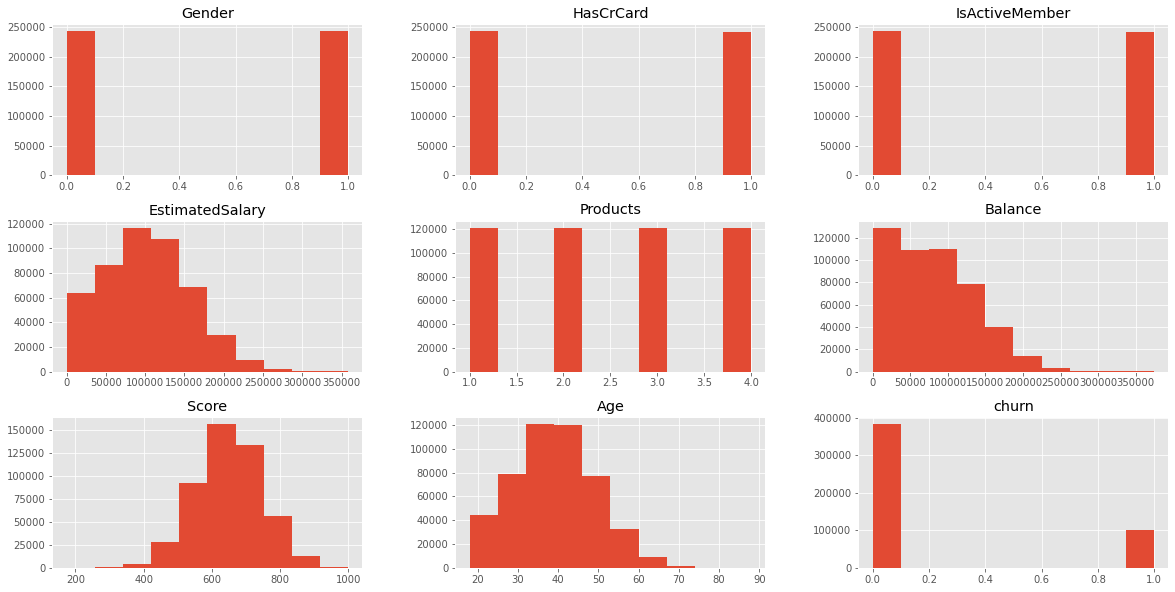

In [60]:
num_bins = 10
clients.hist(bins = num_bins, figsize=(20,10))
plt.show()

### Dividir Test y Train

In [61]:
X = clients[['Gender','HasCrCard','IsActiveMember', 'EstimatedSalary','Products','Balance','Score','Age']]
Y = clients.iloc[:,13]

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Probando Modelos

In [63]:
models = ["Nearest_Neighbors", "Decision_Tree", "Random_Forest", "Neural_Net"]

In [64]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000)]
# Usando Hiperparámetros default

In [181]:
scores = []
for model, clf in zip(models, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)
# Comparamos accuracy de los clasificadores con la línea base

In [182]:
scores

[0.7241760056136874,
 0.7915712133407632,
 0.7916124904546674,
 0.7916124904546674]

In [184]:
sc = pd.DataFrame()
sc['models'] = models
sc['score'] = scores
sc

,models,score
0,Nearest_Neighbors,0.724
1,Decision_Tree,0.792
2,Random_Forest,0.792
3,Neural_Net,0.792


Entre los tres mejores clasificadores base destacan el Decision Tree, Random Forest y la Red Neuronal. Como la mejora de accuracy respecto al primero no es muy significativa, se usará el Decision Tree al permitirnos tener resultados más interpetables y sencillos que los otros dos, además que resulta en menores tiempos de procesamiento.

Por otra parte, la base de datos posee 484527 registros y se utilizarán 8 variables para el modelo, por lo que la data sí es suficientemente grande para usar este algoritmo.

### Elaborando Árbol de decisiones y oversampling

In [65]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))

In [66]:
classifier = DecisionTreeClassifier

In [67]:
pipeline = make_pipeline(classifier(random_state=42, max_depth=3))
model = pipeline.fit(X_train, Y_train)
prediction = model.predict(X_test)

Es necesario notar que existe un problema de desbalanceo: tanto en el train como el el test de la data, casi el 80% corresponde a que no es churn (no ha cancelado el producto dentro de los dos años)

In [68]:
Y_train.value_counts()

0    306656
1     80965
Name: churn, dtype: int64

In [69]:
Y_train.value_counts(normalize=True)*100

0   79.112
1   20.888
Name: churn, dtype: float64

In [70]:
Y_test.value_counts()

0    76910
1    19996
Name: churn, dtype: int64

In [71]:
Y_test.value_counts(normalize=True)*100

0   79.366
1   20.634
Name: churn, dtype: float64

Para solucionar el problema se utilizará SMOTE imblearn para balancear por oversampling y mejorar las predicciones del modelo.

In [72]:
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(max_depth=3, random_state=42))
smote_model = smote_pipeline.fit(X_train, Y_train)
smote_prediction = smote_model.predict(X_test)

In [73]:
print()
print("normal data distribution: {}".format(Counter(Y)))
X_smote, Y_smote = SMOTE().fit_resample(X, Y)
print("SMOTE data distribution: {}".format(Counter(Y_smote)))


normal data distribution: Counter({0: 383566, 1: 100961})
SMOTE data distribution: Counter({0: 383566, 1: 383566})


In [74]:
print(classification_report(Y_test, prediction))
print(classification_report_imbalanced(Y_test, smote_prediction))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     76910
           1       0.30      0.00      0.00     19996

    accuracy                           0.79     96906
   macro avg       0.55      0.50      0.44     96906
weighted avg       0.69      0.79      0.70     96906

                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      0.50      0.50      0.61      0.50      0.25     76910
          1       0.21      0.50      0.50      0.29      0.50      0.25     19996

avg / total       0.67      0.50      0.50      0.55      0.50      0.25     96906



In [75]:
print()
print_results("normal classification", Y_test, prediction)
print()
print_results("SMOTE classification", Y_test, smote_prediction)


normal classification
accuracy: 0.7936144304790209
precision: 0.3
recall: 0.00015003000600120024
f1: 0.0002999100269919024

SMOTE classification
accuracy: 0.5010938435184612
precision: 0.20795648859679844
recall: 0.5048009601920385
f1: 0.29456482089443353


### Gráficos

In [76]:
feature_names = list(X.columns.values)
Class_names = ['Not_Churn', 'Churn']

[Text(697.5, 951.3000000000001, 'Score <= 322.5\ngini = 0.33\nsamples = 387621\nvalue = [306656, 80965]\nclass = Not_Churn'),
 Text(348.75, 679.5, 'EstimatedSalary <= 70150.551\ngini = 0.406\nsamples = 141\nvalue = [101, 40]\nclass = Not_Churn'),
 Text(174.375, 407.70000000000005, 'EstimatedSalary <= 29049.82\ngini = 0.495\nsamples = 42\nvalue = [23, 19]\nclass = Not_Churn'),
 Text(87.1875, 135.89999999999998, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = Not_Churn'),
 Text(261.5625, 135.89999999999998, 'gini = 0.466\nsamples = 27\nvalue = [10, 17]\nclass = Churn'),
 Text(523.125, 407.70000000000005, 'EstimatedSalary <= 169327.977\ngini = 0.334\nsamples = 99\nvalue = [78, 21]\nclass = Not_Churn'),
 Text(435.9375, 135.89999999999998, 'gini = 0.288\nsamples = 86\nvalue = [71, 15]\nclass = Not_Churn'),
 Text(610.3125, 135.89999999999998, 'gini = 0.497\nsamples = 13\nvalue = [7, 6]\nclass = Not_Churn'),
 Text(1046.25, 679.5, 'Score <= 329.5\ngini = 0.33\nsamples = 387480\nvalue = [

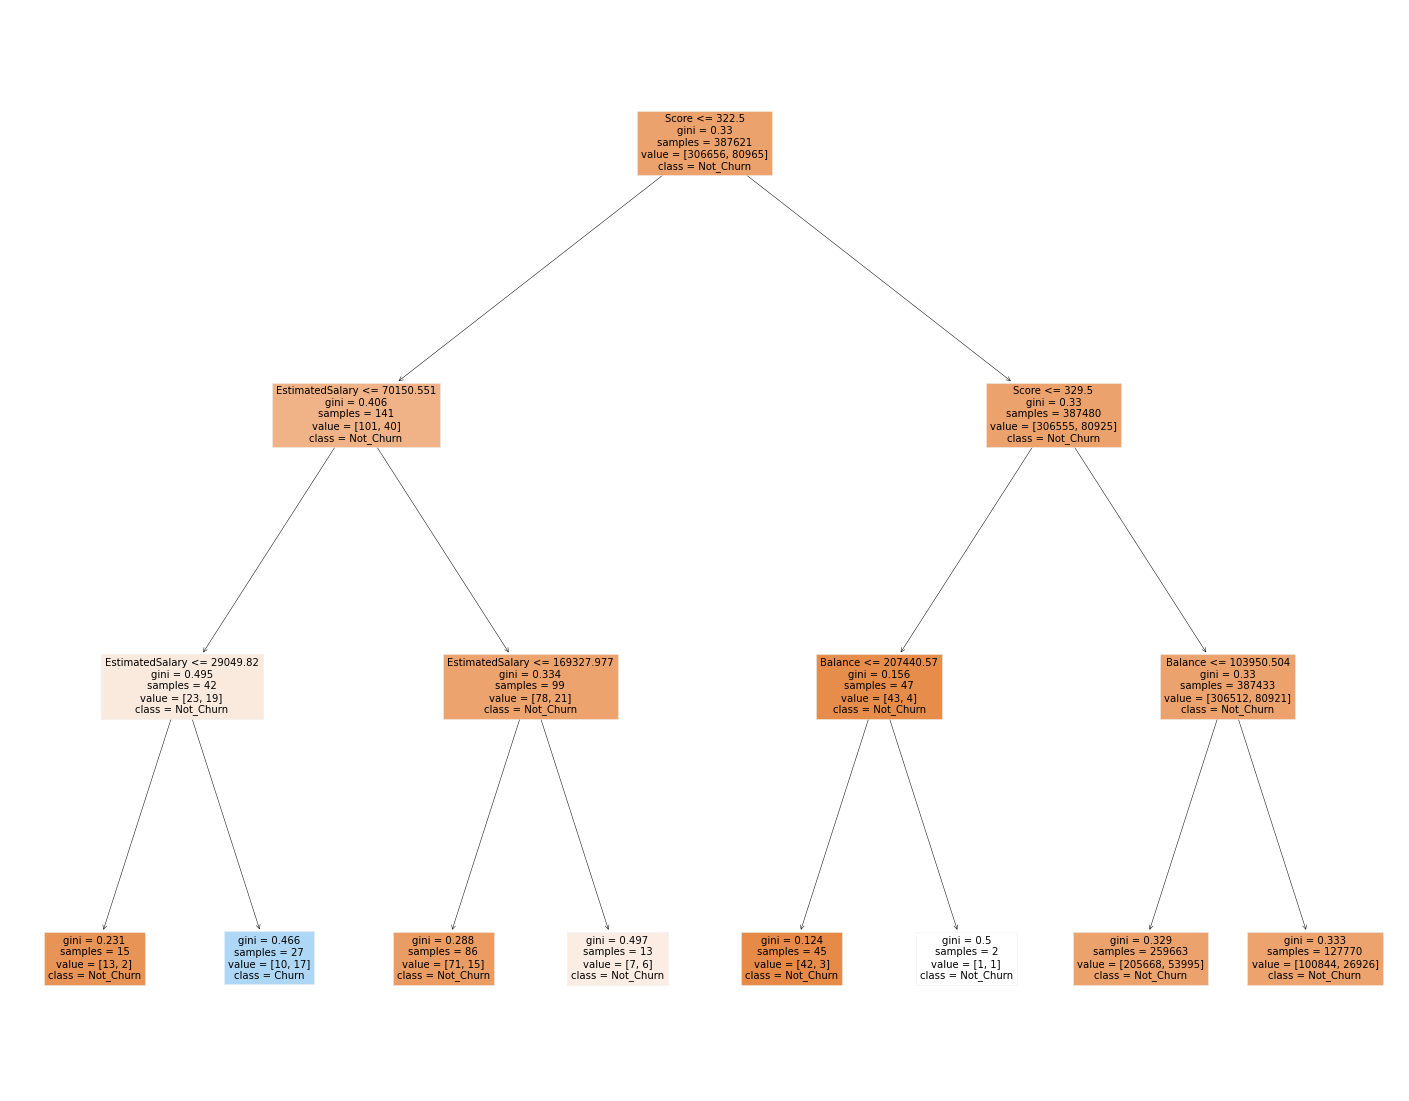

In [77]:
# Baseline
fig = plt.figure(figsize=(25,20))
plot_tree(model['decisiontreeclassifier'],feature_names= feature_names, class_names= Class_names,filled=True)

[Text(697.5, 951.3000000000001, 'HasCrCard <= 0.5\ngini = 0.5\nsamples = 613312\nvalue = [306656, 306656]\nclass = Not_Churn'),
 Text(348.75, 679.5, 'IsActiveMember <= 0.5\ngini = 0.488\nsamples = 363928\nvalue = [153213, 210715]\nclass = Churn'),
 Text(174.375, 407.70000000000005, 'Gender <= 0.5\ngini = 0.449\nsamples = 224848\nvalue = [76665, 148183]\nclass = Churn'),
 Text(87.1875, 135.89999999999998, 'gini = 0.39\nsamples = 144478\nvalue = [38292, 106186]\nclass = Churn'),
 Text(261.5625, 135.89999999999998, 'gini = 0.499\nsamples = 80370\nvalue = [38373, 41997]\nclass = Churn'),
 Text(523.125, 407.70000000000005, 'Gender <= 0.5\ngini = 0.495\nsamples = 139080\nvalue = [76548, 62532]\nclass = Not_Churn'),
 Text(435.9375, 135.89999999999998, 'gini = 0.499\nsamples = 79903\nvalue = [38254, 41649]\nclass = Churn'),
 Text(610.3125, 135.89999999999998, 'gini = 0.457\nsamples = 59177\nvalue = [38294, 20883]\nclass = Not_Churn'),
 Text(1046.25, 679.5, 'IsActiveMember <= 0.5\ngini = 0.473\

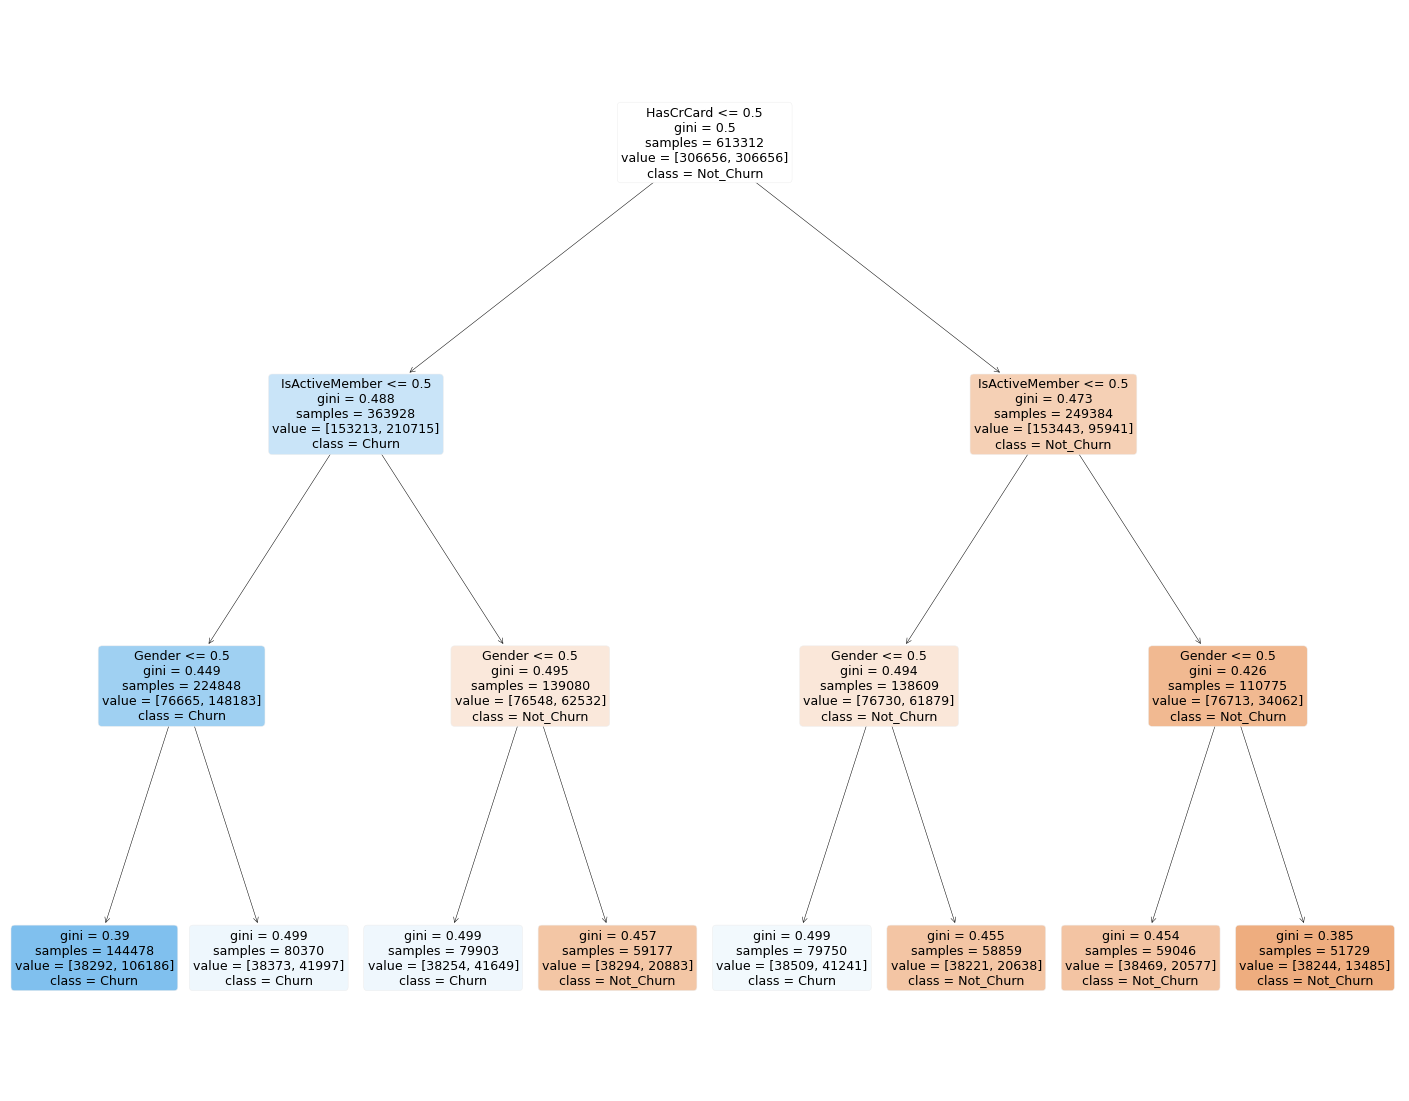

In [78]:
# Final
fig = plt.figure(figsize=(25,20))
plot_tree(smote_model['decisiontreeclassifier'],feature_names= feature_names,
          class_names= Class_names, filled=True, rounded=True)